# Chapter 3

##  The rate "law"

In CKN 321 we focus primarily on the power law model to describe the reaction rate. ** IT IS CRITICALLY IMPORTANT TO NOTE THAT THIS IS NOT THE ONLY WAY TO DESCRRIBE REACTION RATE, IT IS JUST THE MOST COMMONLY USED METHOD FOR CHEMICAL REACTIONS**


Definitions:
- A homogeneous reaction is one that involves only one phase. 
- A heterogeneous reaction involves more than one phase, and reaction usually occurs at or very near the interface between the phases, 
- A reversible reaction can proceed in either direction, depending on the concentrations of reactants and products relative to the corresponding equiHbrium concentrations.
- An irreversible reaction is one that proceeds in only one direction and continues in that direction until the reactants are exhausted. An irreversible reaction behaves as if no equilibrium condition exists. Strictly speaking, no chemical reaction is completely irreversible, but in very many reactions the equilibrium point is so far to the right that they are treated as irreversible reactions.

## RATE AND CONCENTRATION

Take a homogeneous reaction:
$$ A+B\to C$$

One can imagine that the amount of C formed is related to the amount of molecular collisions between A and B. Statistically one can prove that the likelihood of a collision is directly proportional to the molecular density (concentration) of both A and B. For this ideal situation it can be shown that 

$$ r_A = -kC_AC_B $$

Note that the product concentration only influence the rate indirectly due to the decrease in reactant concentration.

To incorporate for non-idealities and catalysed reactions, reaction engineers typically generalise the rate-concentration relationship to a generic power law model giving:

$$ r_A = -kC_A^mC_B^n $$

Sometimes (and only sometimes) it happens that the following reaction:
$$mA+nB\to yC$$

has a rate expression given by:

$$r_A = -kC_A^mC_B^n$$

This is referred to as an *elementary reaction*. **Note that there is no need for the rate order to be related to the reaction stoichiometry.**


The order of the reaction is typically whole numbers, but can be fractions. 

Power law kinetics do not always represent reaction rates, but for most reactions the power law format is sufficient. 

It is very important to realise that the rate constant has units that is related to the rate definition (volume or mass) as well as the overall rate order. The units of the constant therefore contains information! 

$$ r_A = -kC_AC_B^2\: [r_A\: units\: \frac{kmol}{m^3.min}] $$

$$ Units \:of\: k = \frac{m^6}{kmol^2.min}$$

$$ r_A' = -k'C_AC_B^2\: [r_A\: units\: \frac{kmol}{kg\:cat.min}] $$

$$ Units\: of\: k' = \frac{m^9}{kmol^2.min.kg\:cat}$$


## RATE AND TEMPERATURE

Reaction orders do not vary with temperature, only the reaction rate constant. This is due to the increase in molecular motion (more collisions). We use the Arhenius relationship to represent this:

$$k = k_oe^{-\left(\frac{E_A}{RT}\right)} $$

We need the two parameters E and ko (both positive). T is defined as the Kelvin temperature and R is the universal gas constant

Plotting this function over the complete temperature range gives:

<img src="kvsT.png" width="500px">

For reactor applications we have an exponential-like behaviour. Note that ko is the rate constant at infinite high temperatures.

Make sure you realise that :
$$ -\left(\frac{E_A}{RT}\right) $$
This should be a dimensionless group, thus get your units right!


Activation Energy (E) has units of J/mol. This parameter quantifies the amount of energy required to increase the reaction rate constant.  of rate constant increase with increasing temperature. Note that Arhenius implies that HOTTER IS ALWAYS FASTER, and that the activation energy tells us how much faster.

See for yourself in the following figure:

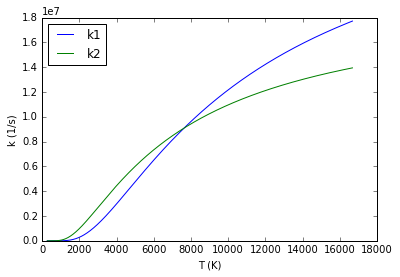

In [72]:
from numpy import linspace, exp
from ipywidgets import interact
import matplotlib.pyplot as plt

R = 8.314 #J/mol.K

def kT(ko1 = 2e7, ko2 = 2e7,  EA1 = 50000, EA2 = 50000,
       Tmin = 273.15, Tmax = 1000):
    T = linspace(Tmin, Tmax, 1000)
    k1 = ko1*exp(-EA1/(R*T))
    k2 = ko2*exp(-EA2/(R*T))
    plt.plot(T, k1, T, k2)
    plt.legend(['k1', 'k2'], loc=2)
    plt.ylabel('k (1/s)')
    plt.xlabel('T (K)')
    
interact(kT, ko1=(1e6, 1e9, 1e5), ko2=(1e6, 1e9, 1e5),
         EA1=(10000, 100000, 1000), EA2=(10000, 100000, 1000),
         Tmin=(150, 1000, 10), Tmax=(1000, 100000, 10))
    

    


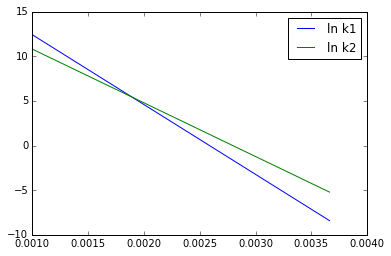

In [73]:
from numpy import linspace, exp, log
from ipywidgets import interact
import matplotlib.pyplot as plt

R = 8.314 #J/mol.K

def kT(ko1 = 2e7, ko2 = 2e7,  EA1 = 50000, EA2 = 50000,
       Tmin = 273.15, Tmax = 1000):
    T = linspace(Tmin, Tmax, 1000)
    logk1 = log(ko1*exp(-EA1/(R*T)))
    logk2 = log(ko2*exp(-EA2/(R*T)))
    plt.plot(1/T, logk1, 1/T, logk2)
    plt.legend(['ln k1', 'ln k2'])
    
interact(kT, ko1=(1e5, 1e9, 1e5), ko2=(1e5, 1e9, 1e5),
         EA1=(10000, 100000, 1000), EA2=(10000, 100000, 1000),
         Tmin=(150, 300, 10), Tmax=(300, 100000, 10))
    

    


# Example

Example 3-1 (textbook):

Calculate the activation energy for the decomposition of benzene diazonium chloride to give chlorobenzene and nitrogen using the following information for this first-order reaction:

|k(1/s)|0.00043|0.00103|0.00180|0.00355|0.00717|
|---|---|---|---|---|---|
|T(K)|313.0|319.0|323.0|328.0|333.0|



Find the ln(k) and 1/T values and plot:

ko= 8.03027639188e+16 1/s, EA= 121481.509418 J/mol, r^2= 0.999857077033


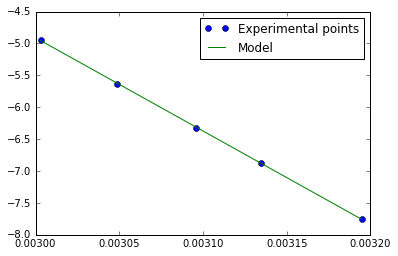

In [64]:
from numpy import log, array, exp, linspace
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

k = array([0.00043, 0.00103, 0.00180, 0.00355, 0.00717])
T = array([313, 319, 323, 328, 333])

lnk = log(k)

slope, intercept, r_value, p_value, std_err = linregress(1/T, lnk)

ko = exp(intercept)
EA = -slope*8.314
print('ko=', ko, '1/s,', 'EA=', EA, 'J/mol,', 'r^2=', r_value**2)

Tspan = linspace(313, 333)
k = ko*exp(-EA/(8.314*Tspan))

plt.plot(1/T, lnk, 'o', 1/Tspan, log(k))
plt.legend(['Experimental points', 'Model'])

## FITTING EXPERIMENTAL DATA WITH PYTHON

We start by graphically representing the experimental data:

<img src="ExpData.png" width = "200px">

We now need a ‘theoretical’ line that will resemble or ‘fit’ the experimental data

<img src="ExpDataFit1.png" width = "200px">
<img src="ExpDataFit2.png" width = "200px">

We obtain an expression for the blue line by proposing a rate expression, followed by substituting the rate expression into a **mole balance(s)**. The resulting equation(s) need to be solved for a choice of rate constant and rate order(s)

**REMEMBER:**

**k is used to fit the magnitude of the experimental curve (values measured)**

**m, n are used to fit the *SHAPE* of the curve** 


# Example

$$ A+3B\to 4C $$

Liquid phase, spontaneous

Raw data:

|Time (min)| $C_A$ (mol/L)|
|---|---|
|0|2.00|
|2|1.33|
|4|1.08|
|6|0.89|
|9|0.69|
|12|0.59|
|16|0.55|
|19|0.48|

$C_{Bo} = 5 mol/L$

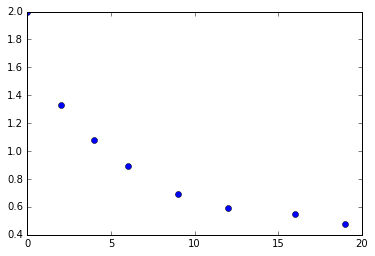

In [71]:
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

te = array([0, 2, 4, 6, 9, 12, 16, 19])
CAe = array([2, 1.33, 1.08, 0.89, 0.69, 0.59, 0.55, 0.48])

plt.plot(te, CAe, 'o')

We need differential equations (DE’s) that describe the change of $C_A$, $C_B$ (and $C_C$). Since all the concentrations are related by stoichiometry we only need to describe one concentration (since the others will be functions of this concentration). But the fastest method is to describe each reactant concentration in its own DE. We therefore need to do a A and B mole balance

$$ \frac{dN_i}{dt} = r_iV $$

$$ r_A = -kC_A^mCB^n $$

$$ r_B = 3r_A $$

$$r_C = -4r_A $$



<function __main__.func>

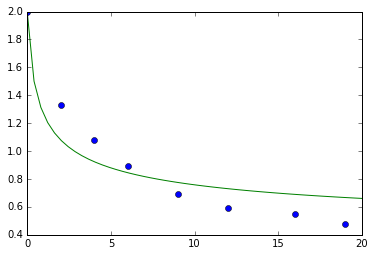

In [76]:
from scipy.integrate import odeint
from numpy import linspace
from ipywidgets import interact

V = 1 #L chosen base
CAo = 2 #mol/L
NAo = CAo*V
CBo = 5 #mol/L
NBo = CBo*V
CCo = 0
NCo = CCo*V

tspan = linspace(0, 20)

def func(k = .01, m = 1, n = 3):
    
    def ri(N):
        NA, NB, NC = N
        CA, CB, CC = N/V
        rA = -k*CA**m*CB**n
        rB = 3*rA
        rC = -4*rA
        return [rA, rB, rC]

    def diffs(N, t):
        NA, NB, NC = N
        rA, rB, rC = ri(N)
        dNAdt, dNBdt, dNCdt = ri(N)*V
        return [dNAdt, dNBdt, dNCdt]
    
    N = odeint(diffs, [NAo, NBo, NCo], tspan)
    C = N/V
    CA = C[:, 0]
    CB = C[:, 1]
    CC = C[:, 2]
    plt.plot(te, CAe, 'o', tspan, CA)

interact(func, k = (0, 1, 0.0001), m = (0, 3, 1), n = (0, 3, 1))

## AUTOCATALYTIC REACTIONS

Look at this interesting irreversible reaction:

$$A+B \to 2B$$

A molecule B reacts with its isomer A (same molecular weight) to form two of itself. There need to be isomers as well as product present for the reaction to happen. The rate will typically be given by: 

$$r_A=kC_A^nC_B^m$$

One will typically start with lots of A and small amounts of B. A will get less and B will get more. What will happen to the rate?

Let’s say $C_A+C_B=10$ and n=m=1. What combination of $C_A$ and $C_B$ will give the maximum product (rate) in a constant volume batch reactor?

$$\frac{dC_B}{dt} = r_B$$


The above calculation should make the following graph clear:

<img src="Autocatalytic.png" width="500ox">

Since the rate goes through a maximum, the slope of CB should also:

<img src="Autocatalytic 2.png" width="500ox">



## Multiple Reactions

Most reactions do not occur in isolation, but rather simultaneously with other reactions. For these reactions selectivity (relative ratios of components) becomes important. Take the simple reactions occurring simultaneously:

E.g.
Reaction 1:
$$A\to B$$

Reaction 2:
$$A\to2C$$

If we assume power law behaviour, the rates of reaction for the respective species can be described as the sum of the reaction rates of the specific species in each reaction:

$$r_{A_1} = -k_{A_1}C_A^{m_1}$$
$$r_{A_2} = -k_{A_2}C_A^{m_2}$$
$$r_A = r_{A_1}+r_{A_2}$$

$$r_{B_1} = -r_{A_1}$$
$$r_{B_2} = 0$$
$$r_B = r_{B_1}+r_{B_2}$$

$$r_{C_1} = 0$$
$$r_{C_2} = -2r_{A_2}$$
$$r_C = r_{C_1}+r_{C_2}$$

Using the rate expressions the mole balances for any reactor configuration can be solved:
Batch:
$$\frac{dN_i}{dt} = r_iV$$

PFR:
$$\frac{dF_i}{dV} = r_i$$

CSTR:
$$F_{Ao}-F_A = -r_AV$$

To solve this in PYTHON is easy. It is however not possible to reduce the description to one DE, neither can we use conversion or stoicheometric tables any more. Take note of this.

Tip: A typical question for this reaction scheme will entail maximizing the ratio of B to C using temperature. The difference in activation energies will be crucial.

## REACTIONS IN SERIES

Take the reaction scheme:
$$ A\to B\to C $$

This reaction scheme can be seen as multiple reactions:

Reaction 1:
$$A\to B$$

Reaction 2:
$$B\to C$$

Which means the same method as above can be used to describe the reaction rates:

$$r_{A_1} = -k_{A_1}C_A^{m_1}$$
$$r_{A_2} = 0$$
$$r_A = r_{A_1}+r_{A_2}$$

$$r_{B_1} = -r_{A_1}$$
$$r_{B_2} = -k_{B_2}C_B^{n_2}$$
$$r_B = r_{B_1}+r_{B_2}$$

$$r_{C_1} = 0$$
$$r_{C_2} = -r_{B_2}$$
$$r_C = r_{C_1}+r_{C_2}$$

Using this in multiple mole balances, followed by numerical solving gives:

<img src="Multiple reactions.png" width="500px">

Note that $C_B$ goes through a maximum, thus $r_C$ also goes through a maximum and therefore the inflection on the $C_C$ curve.


## MULTIPLE REACTIONS IN GENERAL

Take the reaction scheme:

$$3A\to B+C$$
$$2C+A\to 3D $$
$$ 4D+3C\to 3E $$

If it is known that the kinetics of the system can be described by:

$$ r_{A_1} = -k_{A_1}C_A $$
$$ r_{D_2} = k_{D_2}C_C^2C_A $$
$$ r_{E_3} = k_{E_3}C_CC_D $$

Determine $r_A$, $r_B$, $r_C$, $r_D$, $r_E$ 

The net rate expression for a component (from different reactions) is used in the mole balance. Make sure to check the reference specie of the rate constants.

You can know model any complex reaction system for a given set of kinetics. Even the magical B-Z reaction (look it up)

## Reversible reactions

From the example of the 4-year old and the 6-year old playing on the tennis court you should understand that:

<img src="Reversible reactions.png" width="500px">

- At a certain time the net-amount of balls on a side will remain the same
- This implies that the rate of balls added to a side is the same as that of the balls leaving the side
- The rate of throwing balls over the net is related to the amount of balls on a side
- Plotting the amount off balls on a side against time will always result in a smooth profile.

A reversible reaction behaves very similar!


Take the following reaction:

$$ A \leftrightharpoons B$$

Which can be seen as two reactions:

$$ A \leftrightharpoons B$$

$$ B \leftrightharpoons A$$

Using an elementary assumption (all reactions in this section will be elementary) we get:



$$ r_A = -k_1C_A+k_2C_B $$

At equilibrium the forward rate is the same as the reverse rate:

$$ r_A = -k_1C_A+k_2C_B = 0 $$

Resulting in the following equality:

$$ \frac{C_{Be}}{C_{Ae}} = \frac{k_1}{k_2} = K_C $$

Make sure you know the definition of the equilibrium constant! The rate can now also be expressed as:

$$ r_A = -k_1C_A+\frac{k_1}{K_C}C_B$$

Depending on the initial amount of A and B we will get different profiles, always ending at a constant ratio of concentrations

$$ C_{Ao}+C_{Bo}= constant $$

<img src = "Equilibrium1.png" width="200px">

<img src = "Equilibrium2.png" width="200px">

If we use conversions, will negative conversions be possible? Think of a example.

Depending on the initial amount of A and B we will get different profiles, always ending at a constant ratio of concentrations


### Fitting reversible reactions

In CKN320 we will only consider elementary reversible reactions.  This entails a simple relationship between the rate constants for any reaction:

$$ \frac{k_1}{k_2}= K_C$$

In order to fit experimental data we require the equilibrium concentrations to calculate Kc. Note that according to definitions the powers used in Kc is the same as the stoicheometric coefficients:

$$ aA+bB\rightleftharpoons cC $$

$$K_C = \frac{C_C^c}{C_A^a C_B^b}$$

<img src="Fit reversible.png" width="500px">

Once $K_c$ is known we only need to fit one rate parameter ($k_1$). The model should end at the final equilibrium concentration. If not $K_c$ was not calculated correctly.

<img src="Fit reversible 2.png" width="500px">



### EQUILIBRIUM AND TEMPERATURE

$K_c$ is a function of temperature and Van't Hoff’s equation is used to determine $K_c$ as a function of temperature:

$$ K_C = K_{Co}e^{\frac{-\Delta H}{RT}} $$

The expression looks very similar to the Arrhenius equation. 

**HAND-IN**

Prove that the Van't Hoff equation can be derived from the Arrhenius equation

The major difference is that $\Delta H$ can be positive (endothermic) or negative (exothermic). $\Delta H$ is normally a constant for a reaction. 

<img src="Vant hoff endo.png" width="500px">
<img src="Vant hoff exo.png" width="500px">

Normally $K_c$ is known at a temperature. The van't Hoff equation is then used to find $K_c$ at a different temperature. We can either calculate Kco or use a difference relationship to determine the new $K_c$:

$$ \ln{\left(\frac{K_{c1}}{K_{c2}}\right)} = \frac{-\Delta H}{R}\left(\frac{1}{T_1}-\frac{1}{T_2}\right) $$

Tip: Your high-school knowledge on Le Chatlier’s principle should apply directly to the equilibrium state of a reaction

Make sure you understand the following curves. Note the difference between rate and equilibrium: 

<img src="Reversible reactions 3.png" width="500px">
<img src="Reversible reactions 4.png" width="500px">
<img src="Reversible reactions 5.png" width="500px">